In [1]:
# Importing Initial Libraries


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
# importing Libraries


In [3]:
df = pd.read_csv('/Users/bobyan/Desktop/Kaggle Datasets/admission_data.csv')

In [5]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Example: df with all numerical columns
# Target = percentage column
X = df.drop(columns=["Chance of Admit "])   # predictors
y = df["Chance of Admit "]                  # regression target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Regression model
reg = RandomForestRegressor(n_estimators=200, random_state=42)
reg.fit(X_train, y_train)

# Predictions
y_pred = reg.predict(X_test)

# Evaluation metrics
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 0.0042817676500000006
R² Score: 0.790622608801956


In [8]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))


Mean Absolute Error (MAE): 0.043774999999999877


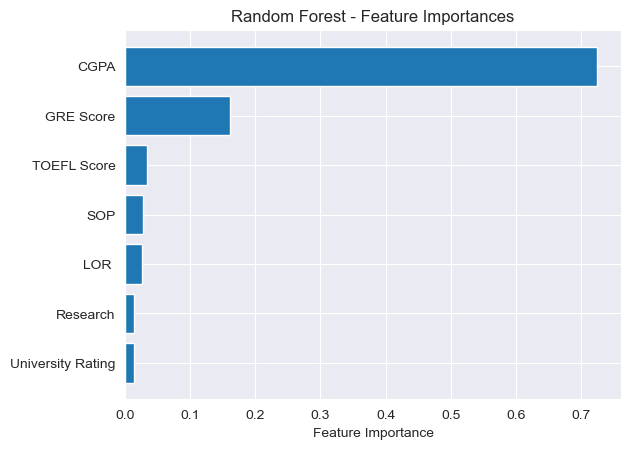

In [9]:
import matplotlib.pyplot as plt

importances = reg.feature_importances_
feat_names = X.columns

sorted_idx = importances.argsort()

plt.barh(feat_names[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importances")
plt.show()


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Assuming you already have X, y defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Neural Net (MLP)": MLPRegressor(hidden_layer_sizes=(64,32), max_iter=1000, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MSE": mse, "R²": r2}

results_df = pd.DataFrame(results).T
print(results_df)


                        MSE        R²
Linear Regression  0.003705  0.818843
Random Forest      0.004346  0.787504
Gradient Boosting  0.004462  0.781815
Neural Net (MLP)   0.028744 -0.405567


In [12]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Ridge Regression
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
results["Ridge Regression"] = [
    mean_squared_error(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_ridge)
]

# Lasso Regression
lasso = Lasso(alpha=0.001, max_iter=10000, random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
results["Lasso Regression"] = [
    mean_squared_error(y_test, y_pred_lasso),
    r2_score(y_test, y_pred_lasso)
]

# Polynomial Regression (degree=2)
poly_model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
results["Polynomial Regression (deg=2)"] = [
    mean_squared_error(y_test, y_pred_poly),
    r2_score(y_test, y_pred_poly)
]

# Show updated results
results_df = pd.DataFrame(results, index=["MSE", "R²"]).T
print(results_df)


                                    MSE        R²
Linear Regression              0.003705  0.818843
Random Forest                  0.004346  0.787504
Gradient Boosting              0.004462  0.781815
Neural Net (MLP)               0.028744 -0.405567
Ridge Regression               0.003722  0.817979
Lasso Regression               0.003807  0.813824
Polynomial Regression (deg=2)  0.003548  0.826512


In [13]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import numpy as np

# --- Random Forest ---
rf = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("Best RF Params:", rf_grid.best_params_)
print("RF Best R²:", rf_grid.best_score_)

# --- Gradient Boosting ---
gb = GradientBoostingRegressor(random_state=42)
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5]
}
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='r2', n_jobs=-1)
gb_grid.fit(X_train, y_train)
print("Best GB Params:", gb_grid.best_params_)
print("GB Best R²:", gb_grid.best_score_)

# --- Neural Net (MLP) ---
mlp = MLPRegressor(max_iter=2000, random_state=42)
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}
mlp_grid = GridSearchCV(mlp, mlp_params, cv=5, scoring='r2', n_jobs=-1)
mlp_grid.fit(X_train, y_train)
print("Best MLP Params:", mlp_grid.best_params_)
print("MLP Best R²:", mlp_grid.best_score_)

# --- Polynomial Regression (deg=3) with CV ---
poly3 = Pipeline([
    ("poly", PolynomialFeatures(degree=3)),
    ("linreg", LinearRegression())
])
scores = cross_val_score(poly3, X_train, y_train, cv=5, scoring='r2')
print("Polynomial (deg=3) CV R²:", np.mean(scores))


Best RF Params: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300}
RF Best R²: 0.785507579108171
Best GB Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
GB Best R²: 0.7821250094587539
Best MLP Params: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,)}
MLP Best R²: 0.5841940253446375
Polynomial (deg=3) CV R²: 0.5090655299166151
